# SVM

Support Vector Machine is a *supervised learning* algorithm used primarly for **classification** tasks, but can also be used for **regression**.

The idea behind SVM is to find an **hyperplane** that divides the data into two classes with the maximum margin. The margin is the distance between the hyperplane and the nearest data points from each class, known as **support vectors**.

Basically, you can stumble upon 2 distinct cases:

*   You have **linearly separable data**: The data can be perfectly divided into two classes by a straight line (in 2D) or a hyperplane (in higher dimensions).

*   You have **Non-linearly separable data**: The data cannot be perfectly separated by a straight line or hyperplane. 

For non-linearly separable data, SVM uses **kernel functions** to map the data into a higher-dimensional space where it becomes linearly separable. Common kernel functions include polynomial, radial basis function (RBF), and sigmoid kernels.

SVM can also handle multi-class classification, but it does so by breaking the problem into binary subproblems. There are two common strategies for extending SVM to multi-class classification, One-vs-One (OvO) and One-vs-Rest (OvR)

Let's start by creating some synthetic data:

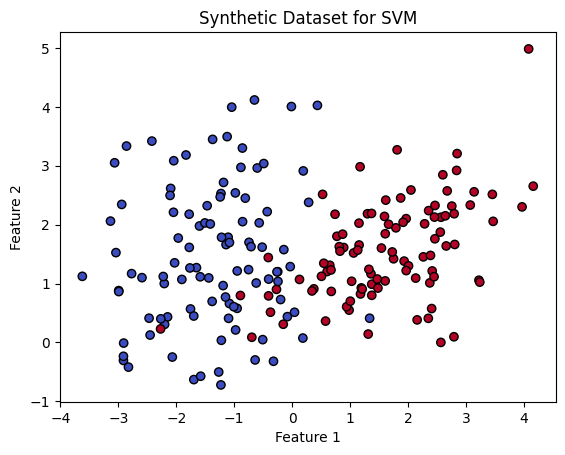

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(
    n_samples=200,     # total number of samples
    n_features=2,      # two features for easy visualization
    n_informative=2,   # number of informative features
    n_redundant=0,     # no redundant features
    n_clusters_per_class=1, # single cluster per class
    class_sep=1.5,     # separation between classes
    random_state=42    # seed for reproducibility
)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset for SVM")
plt.show()


### Steps to implement the SVM algorithm

1)  Splitting the dataset into training and testing sets.

2)  Initializing and training the SVM model.

3)  Making predictions and evaluating the model.

In [3]:
# Import necessary libraries

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


### Splitting the dataset into training and testing sets.

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Initializing and training the SVM model.

In [6]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # using a linear kernel for simplicity

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Making predictions and evaluating the model.

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.86      0.96      0.91        26

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



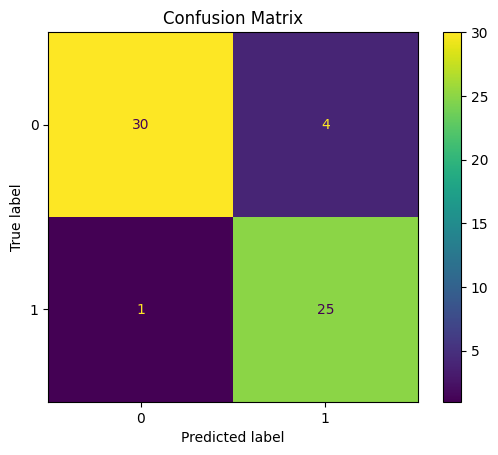

In [7]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

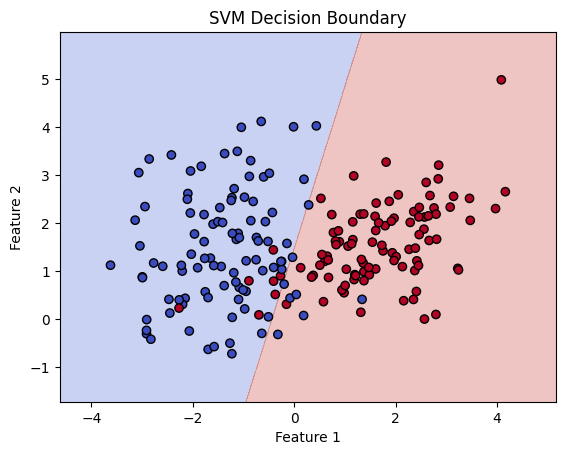

In [8]:
# Visualize decision boundary

def plot_decision_boundary(model, X, y):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict across the grid to plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_model, X, y)
